#Bank Statements (P1- BankStatements.json) – 50 Marks



**1)Transaction Analysis:**

In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from pandas import json_normalize

In [ ]:
d1 = pd.read_excel("/content/sample_data/Json_Transiction.xlsx")
d1

Column1.type Column1.mode  Column1.amount  Column1.currentBalance  \
0          DEBIT         CARD           100.0                 2180.80   
1          DEBIT         CARD           170.0                 2010.80   
2          DEBIT         CARD           500.0                 1510.80   
3         CREDIT       OTHERS            15.0                 1525.80   
4          DEBIT          ATM          1000.0                  525.80   
..           ...          ...             ...                     ...   
980        DEBIT          UPI            80.0                   23.41   
981       CREDIT       OTHERS           938.0                  961.41   
982        DEBIT          UPI            60.0                  901.41   
983        DEBIT          UPI           130.0                  771.41   
984        DEBIT          UPI            10.0                  761.41   

    Column1.transactionTimestamp Column1.valueDate Column1.txnId  \
0      2023-06-27T09:40:19+05:30        2023-06-27     S39488701   
1      2023-06-28T09:51:57+05:30        2023-06-28     S76862822   
2      2023-07-26T10:04:00+05:30        2023-07-26     S31451661   
3      2023-08-06T11:10:38+05:30        2023-07-31     S66463256   
4      2023-08-07T17:13:13+05:30        2023-08-07     S18475743   
..                           ...               ...           ...   
980    2024-05-29T17:57:40+05:30        2024-05-29     S68913329   
981    2024-05-30T05:07:05+05:30        2024-05-30     S87517914   
982    2024-05-30T09:58:24+05:30        2024-05-30     S94085910   
983    2024-05-30T13:30:30+05:30        2024-05-30      S4676116   
984    2024-05-30T13:38:20+05:30        2024-05-30      S5042978   

                                     Column1.narration  Column1.reference  
0                PRCR/MS NEHA FILLING STATIO/FARRUKHAB                NaN  
1                PRCR/MS NEHA FILLING STATIO/FARRUKHAB                NaN  
2                PRCR/MS NEHA FILLING STATIO/FARRUKHAB                NaN  
3          51888100006461IntPd01-05-2023 to 31-07-2023                NaN  
4               ATM/CASH/321917012791/XXXXXXXXXXXX8896                NaN  
..                                                 ...                ...  
980     UPI/415067358040/175740/UPI/paytmqr1reyim9t8ap                NaN  
981  NEFT-AXNPN15145877034-PHONEPE PRIVATE LIMITED-...       9.220200e+14  
982     UPI/451708846336/095823/UPI/Q936188905ybl/Paym                NaN  
983     UPI/451747322898/133029/UPI/Q601737327ybl/Paym                NaN  
984     UPI/451711506710/133820/UPI/Q596679282ybl/Paym                NaN  

[985 rows x 9 columns]

**What is the total number of transactions made over the year?**

In [ ]:
d1.count()

Column1.type                    985
Column1.mode                    985
Column1.amount                  985
Column1.currentBalance          985
Column1.transactionTimestamp    985
Column1.valueDate               985
Column1.txnId                   985
Column1.narration               985
Column1.reference               159
dtype: int64

Column1.transactionTimestamp = 985
Between 27/06/2023 To 30/05/2024 There are 338 Days to compleye 1  year there are still 22 days are remaining.
In 338 Days 985 transiction are done.




In [ ]:
d1.describe()


Column1.amount  Column1.currentBalance  Column1.reference
count      985.000000              985.000000       1.590000e+02
mean       855.492802             5901.308721       9.220074e+14
std       3007.515100             8670.950436       1.586054e+11
min          1.000000                0.800000       9.200201e+14
25%         40.000000             1174.800000       9.220200e+14
50%        160.000000             2723.110000       9.220200e+14
75%        500.000000             5834.110000       9.220200e+14
max      45000.000000            58450.800000       9.220200e+14

In [ ]:
d1['Column1.amount'].median()

160.0

**What is the distribution of transaction amounts (e.g., small vs. large transactions)?**

Median of the amount column is 160 means its a middle value for the amount.So we consider less than 160 are comes under small transiction catagory and more than 160 are comes under big transiction.

**Small Transactions**

In [ ]:
# Count the numbers less than the median
less_than_median = d1[d1['Column1.amount'] < 160].shape[0]
print(less_than_median)

492


There are 492 small transactions.Range Between 1 RS to 159 RS.

**Big Transaction**

In [ ]:
# Count the numbers greater than the median
greater_than_median = d1[d1['Column1.amount'] > 160].shape[0]
print(greater_than_median)

490


There are 490 large transactions.Range Between 161 RS to 45000 RS.

In [ ]:
# Count the numbers equal to the median
equal_to_median = d1[d1['Column1.amount'] == 160].shape[0]
print(equal_to_median)

3


There are 3 transaction are equal to 160(median).

**Analyze the frequency of different transaction types (debit vs. credit).**



In [ ]:
DEBIT = 'DEBIT'  # Replace with the specific value you want to count

# Calculate the frequency of the specific value in the column
DEBIT_value_count = (d1['Column1.type'] == DEBIT).sum()
DEBIT_value_count

695

Frequency of Debited is 695.

In [ ]:
CREDIT = 'CREDIT'  # Replace with the specific value you want to count

# Calculate the frequency of the specific value in the column
CREDIT_value_count = (d1['Column1.type'] == CREDIT).sum()
CREDIT_value_count

290

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from matplotlib import pyplot as plt

Frequency of Credited is 290.

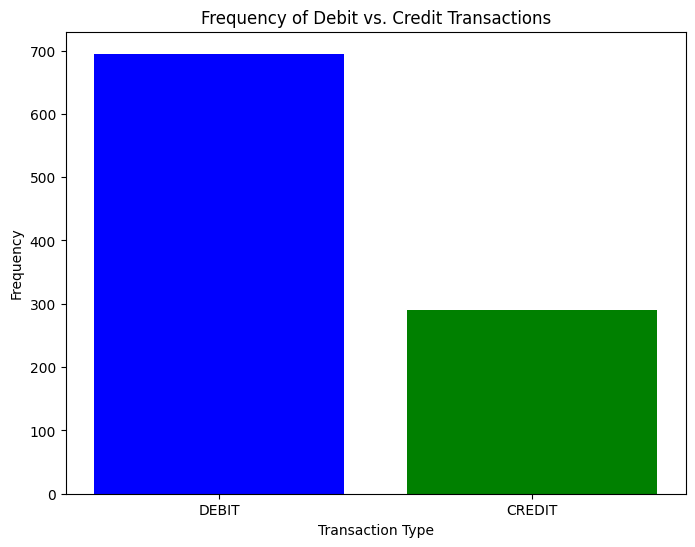

In [ ]:
# Bar plot banana
plt.figure(figsize=(8, 6))
plt.bar(['DEBIT', 'CREDIT'], [DEBIT_value_count, CREDIT_value_count], color=['blue', 'green'])
plt.xlabel('Transaction Type')
plt.ylabel('Frequency')
plt.title('Frequency of Debit vs. Credit Transactions')
plt.show()

**2)Balance Analysis:**

In [ ]:

d1['Column1.transactionTimestamp'] = pd.to_datetime(d1['Column1.transactionTimestamp'])

d1 = d1.sort_values(by='Column1.transactionTimestamp')


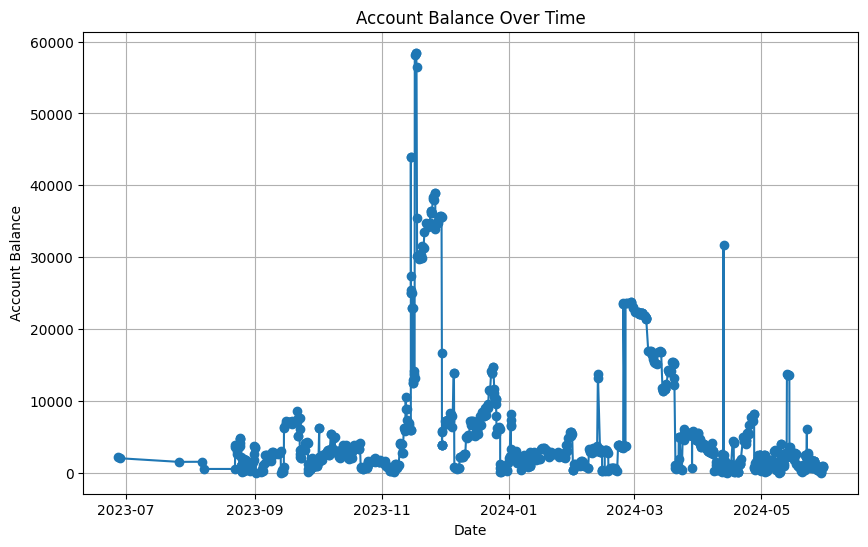

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(d1['Column1.transactionTimestamp'], d1['Column1.currentBalance'], marker='o')
plt.title('Account Balance Over Time')
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.grid(True)
plt.show()

**3)Spending Patterns:**

- What are the main categories of expenses (e.g., fuel, Ecommerce, food, shopping, ATM withdrawals, UPI transactions)?

In [ ]:
column_name = 'Column1.mode'
record_counts = d1[column_name].value_counts()

print("Unique records with their counts:")
print(record_counts)

Unique records with their counts:
Column1.mode
UPI       789
OTHERS    188
CARD        4
ATM         3
CASH        1
Name: count, dtype: int64


In [ ]:
UPI = 'UPI'
UPI_value_count = (d1['Column1.mode'] == UPI).sum()
UPI_value_count

789

In [ ]:
ATM = 'ATM'
ATM_value_count = (d1['Column1.mode'] == ATM).sum()
ATM_value_count

3

In [ ]:
CARD = 'CARD'
CARD_value_count = (d1['Column1.mode'] == CARD).sum()
CARD_value_count

4

In [ ]:
CASH = 'CASH'
CASH_value_count = (d1['Column1.mode'] == CASH).sum()
CASH_value_count

1

In [ ]:
OTHERS = 'OTHERS'
OTHERS_value_count = (d1['Column1.mode'] == OTHERS).sum()
OTHERS_value_count

188

   - Analyze the frequency and amount of spending in each category.

In [ ]:

category_column = 'Column1.mode'
amount_column = 'Column1.amount'

frequency = d1[category_column].value_counts()

total_amount_spent = d1.groupby(category_column)[amount_column].sum()
analysis = pd.DataFrame({
    'Frequency': frequency,
    'Total Amount Spent': total_amount_spent
})

print("Analysis of spending by category:")
print(analysis)


Analysis of spending by category:
              Frequency  Total Amount Spent
Column1.mode                               
ATM                   3            13500.00
CARD                  4              830.00
CASH                  1            45000.00
OTHERS              188           196237.51
UPI                 789           587092.90


##4.  Income Analysis:

In [ ]:
CREDIT = 'CREDIT'
CREDIT_value_count = (d1['Column1.type'] == CREDIT).sum()
CREDIT_value_count

290

   - What are the main sources of income (e.g., salary, UPI credits)?

In [ ]:
source_column = 'Column1.mode'
amount_column = 'Column1.amount'
credited_df = d1[d1[amount_column] > 0]
credited_df

Column1.type Column1.mode  Column1.amount  Column1.currentBalance  \
0          DEBIT         CARD           100.0                 2180.80   
1          DEBIT         CARD           170.0                 2010.80   
2          DEBIT         CARD           500.0                 1510.80   
3         CREDIT       OTHERS            15.0                 1525.80   
4          DEBIT          ATM          1000.0                  525.80   
..           ...          ...             ...                     ...   
980        DEBIT          UPI            80.0                   23.41   
981       CREDIT       OTHERS           938.0                  961.41   
982        DEBIT          UPI            60.0                  901.41   
983        DEBIT          UPI           130.0                  771.41   
984        DEBIT          UPI            10.0                  761.41   

    Column1.transactionTimestamp Column1.valueDate Column1.txnId  \
0      2023-06-27T09:40:19+05:30        2023-06-27     S39488701   
1      2023-06-28T09:51:57+05:30        2023-06-28     S76862822   
2      2023-07-26T10:04:00+05:30        2023-07-26     S31451661   
3      2023-08-06T11:10:38+05:30        2023-07-31     S66463256   
4      2023-08-07T17:13:13+05:30        2023-08-07     S18475743   
..                           ...               ...           ...   
980    2024-05-29T17:57:40+05:30        2024-05-29     S68913329   
981    2024-05-30T05:07:05+05:30        2024-05-30     S87517914   
982    2024-05-30T09:58:24+05:30        2024-05-30     S94085910   
983    2024-05-30T13:30:30+05:30        2024-05-30      S4676116   
984    2024-05-30T13:38:20+05:30        2024-05-30      S5042978   

                                     Column1.narration  Column1.reference  
0                PRCR/MS NEHA FILLING STATIO/FARRUKHAB                NaN  
1                PRCR/MS NEHA FILLING STATIO/FARRUKHAB                NaN  
2                PRCR/MS NEHA FILLING STATIO/FARRUKHAB                NaN  
3          51888100006461IntPd01-05-2023 to 31-07-2023                NaN  
4               ATM/CASH/321917012791/XXXXXXXXXXXX8896                NaN  
..                                                 ...                ...  
980     UPI/415067358040/175740/UPI/paytmqr1reyim9t8ap                NaN  
981  NEFT-AXNPN15145877034-PHONEPE PRIVATE LIMITED-...       9.220200e+14  
982     UPI/451708846336/095823/UPI/Q936188905ybl/Paym                NaN  
983     UPI/451747322898/133029/UPI/Q601737327ybl/Paym                NaN  
984     UPI/451711506710/133820/UPI/Q596679282ybl/Paym                NaN  

[985 rows x 9 columns]

In [ ]:
total_credited_by_source = credited_df.groupby(source_column)[amount_column].sum()
#print("List of Credited Transactions:")
#print(credited_df)

print("\nTotal Credited Amount by Source:")
print(total_credited_by_source)


Total Credited Amount by Source:
Column1.mode
ATM        13500.00
CARD         830.00
CASH       45000.00
OTHERS    196237.51
UPI       587092.90
Name: Column1.amount, dtype: float64


   - Identify any patterns in the timing and amount of income received.



In [ ]:
date_column = 'Column1.transactionTimestamp'

In [ ]:
amount_column = 'Column1.amount'
date_column = 'Column1.transactionTimestamp'

In [ ]:
daily_income = income_df.groupby(pd.Grouper(key=date_column, freq='D')).agg({
    amount_column: ['sum', 'mean', 'size']  # Total income, average income, and frequency of transactions per day
})

# Step 4: Rename Columns for Clarity
daily_income.columns = ['Total Income', 'Average Income', 'Frequency']

# Display the Results
print("\nIncome Analysis Per Day:")
print(daily_income)


Income Analysis Per Day:
                              Total Income  Average Income  Frequency
Column1.transactionTimestamp                                         
2023-06-27 00:00:00+05:30            100.0      100.000000          1
2023-06-28 00:00:00+05:30            170.0      170.000000          1
2023-06-29 00:00:00+05:30              0.0             NaN          0
2023-06-30 00:00:00+05:30              0.0             NaN          0
2023-07-01 00:00:00+05:30              0.0             NaN          0
...                                    ...             ...        ...
2024-05-26 00:00:00+05:30            520.0       86.666667          6
2024-05-27 00:00:00+05:30            851.0      141.833333          6
2024-05-28 00:00:00+05:30            470.0      156.666667          3
2024-05-29 00:00:00+05:30           1145.9      190.983333          6
2024-05-30 00:00:00+05:30           1138.0      284.500000          4

[339 rows x 3 columns]


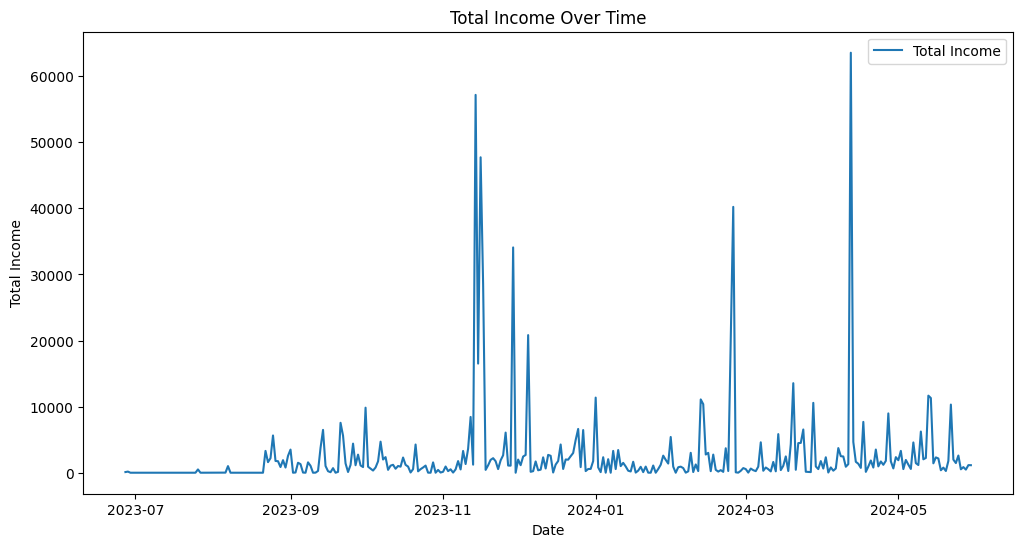

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(daily_income.index, daily_income['Total Income'], label='Total Income')
plt.title('Total Income Over Time')
plt.xlabel('Date')
plt.ylabel('Total Income')
plt.legend()
plt.show()

   - Identify any patterns in the timing and amount of income received.



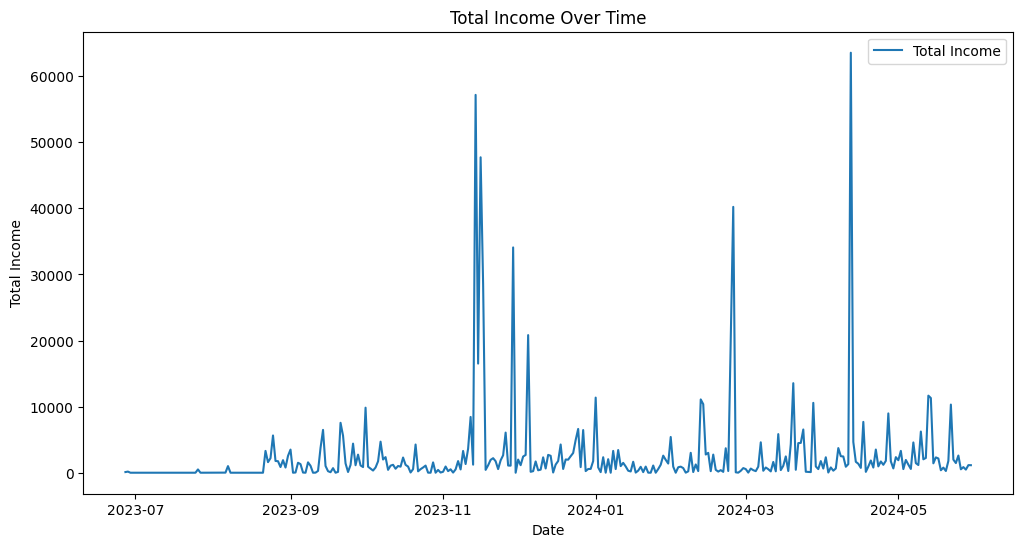

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(daily_income.index, daily_income['Total Income'], label='Total Income')
plt.title('Total Income Over Time')
plt.xlabel('Date')
plt.ylabel('Total Income')
plt.legend()
plt.show()


##5.  Alert Generation:

   - Identify any unusual or suspicious transactions.

In [ ]:

d1['Z-score'] = np.abs((d1['Column1.amount'] - d1['Column1.amount'].mean()) / d1['Column1.amount'].std())
threshold = 3


In [ ]:
suspicious_transactions = d1[d1['Z-score'] > threshold]
print("\nSuspicious Transactions:")
print(suspicious_transactions[[date_column, amount_column]])



Suspicious Transactions:
    Column1.transactionTimestamp  Column1.amount
275    2023-11-14 18:31:11+05:30         37999.0
277    2023-11-14 18:49:41+05:30         16500.0
285    2023-11-15 17:48:21+05:30         10000.0
291    2023-11-16 15:51:14+05:30         45000.0
295    2023-11-17 16:34:54+05:30         21000.0
332    2023-11-29 16:15:33+05:30         19000.0
333    2023-11-29 17:09:47+05:30         12700.0
353    2023-12-05 15:50:06+05:30         13000.0
535    2024-02-12 13:22:57+05:30         10000.0
537    2024-02-13 14:01:51+05:30         10000.0
570    2024-02-24 18:55:15+05:30         20000.0
572    2024-02-25 11:08:34+05:30         20000.0
576    2024-02-25 20:08:58+05:30         20000.0
648    2024-03-20 18:56:48+05:30         12000.0
743    2024-04-12 20:47:44+05:30         30000.0
744    2024-04-12 20:50:06+05:30         30000.0
884    2024-05-13 06:54:41+05:30         11530.0
889    2024-05-14 11:51:56+05:30         10000.0


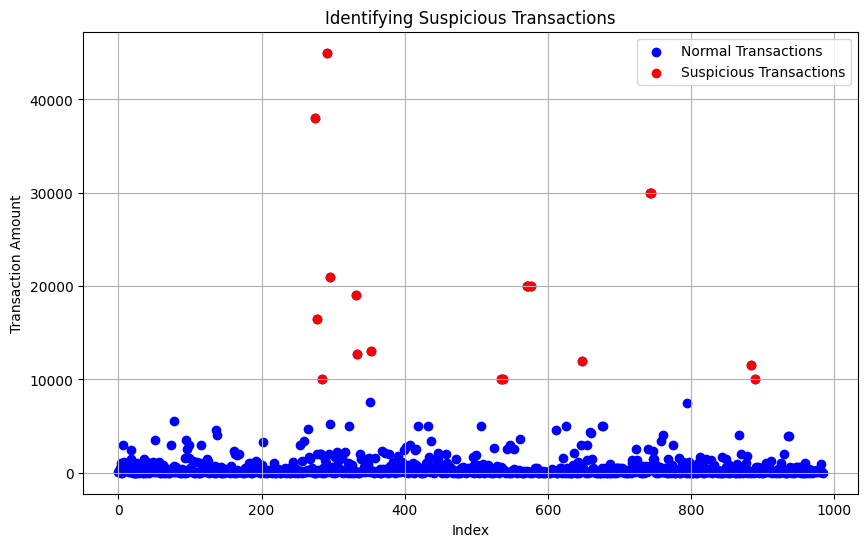

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(d1.index, d1[amount_column], color='blue', label='Normal Transactions')
plt.scatter(suspicious_transactions.index, suspicious_transactions[amount_column], color='red', label='Suspicious Transactions')
plt.title('Identifying Suspicious Transactions')
plt.xlabel('Index')
plt.ylabel('Transaction Amount')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
d1['Column1.transactionTimestamp'] = pd.to_datetime(d1['Column1.transactionTimestamp'])
d1 = d1.sort_values(by='Column1.transactionTimestamp')
low_balance_threshold = 250

   - Generate alerts for low balance or high expenditure periods

In [ ]:
low_balance_alerts = d1[d1['Column1.currentBalance'] < low_balance_threshold]
print("Alerts for Low Balance Periods:")
print(low_balance_alerts[['Column1.txnId','Column1.transactionTimestamp', 'Column1.currentBalance']])


Alerts for Low Balance Periods:
    Column1.txnId Column1.transactionTimestamp  Column1.currentBalance
26      S18720196    2023-08-25 16:56:59+05:30                  175.80
27      S22642750    2023-08-25 18:23:59+05:30                  145.80
28      S23309045    2023-08-25 18:37:02+05:30                  196.80
29      S51405185    2023-08-26 15:06:16+05:30                  195.80
40      S57790074    2023-08-29 11:49:00+05:30                  195.80
51      S73798851    2023-09-01 10:42:42+05:30                    0.80
52      S77153314    2023-09-03 18:19:09+05:30                   34.80
73      S67400576    2023-09-13 10:19:32+05:30                   29.80
76       S8341478    2023-09-14 10:24:31+05:30                  169.80
116     S77362219    2023-09-26 10:03:39+05:30                  153.80
238      S2568744    2023-11-04 15:57:51+05:30                  230.80
239     S17185403    2023-11-04 20:26:16+05:30                  211.80
240     S61083472    2023-11-05 21:15:06+05:3